In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [82]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('C:/Users/DANIYAL1/Desktop/Mall_Customers.csv')

In [83]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
customer_data.shape

(200, 5)

In [72]:
customer_data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [73]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [74]:
X = customer_data.iloc[:,[3,4]].values

In [75]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [76]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


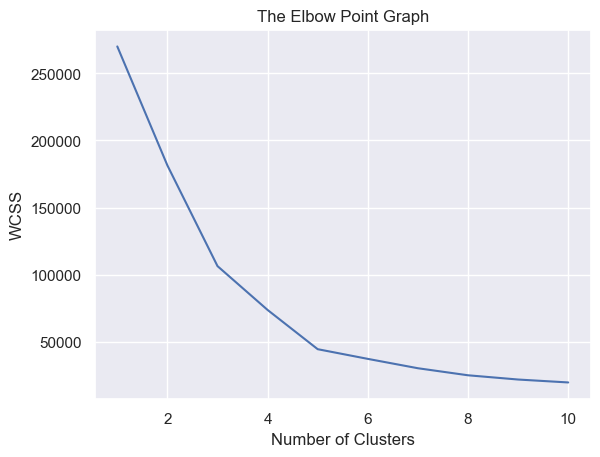

In [77]:
import warnings
from sklearn.cluster import KMeans

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Your code for plotting the Elbow Point Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [78]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


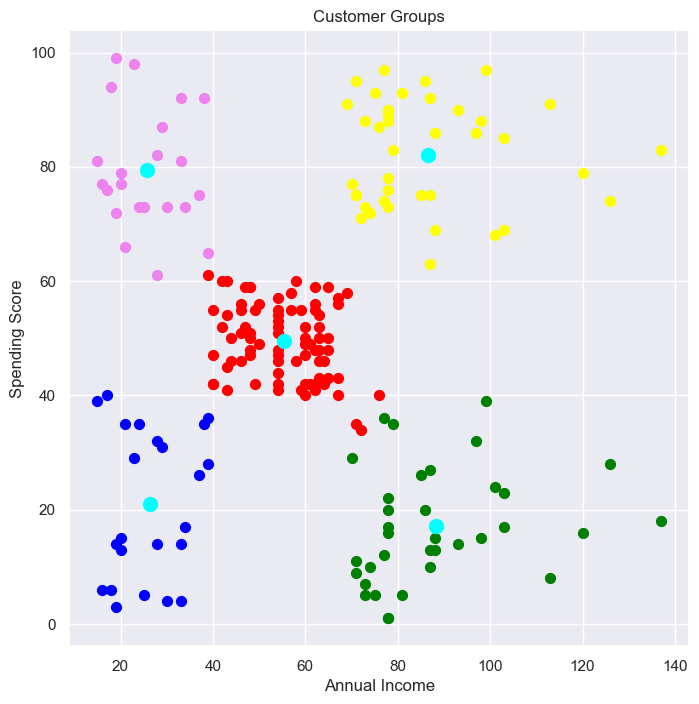

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


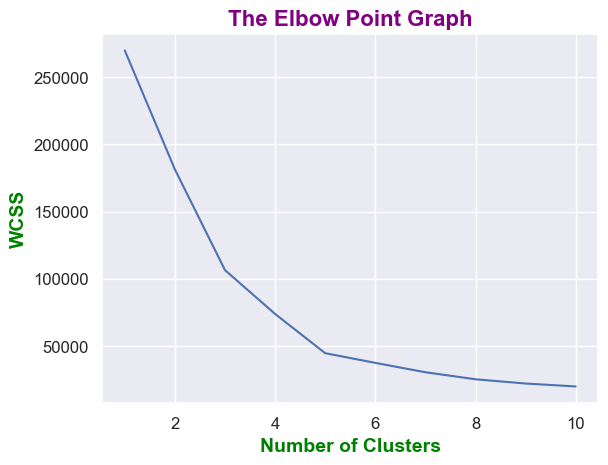

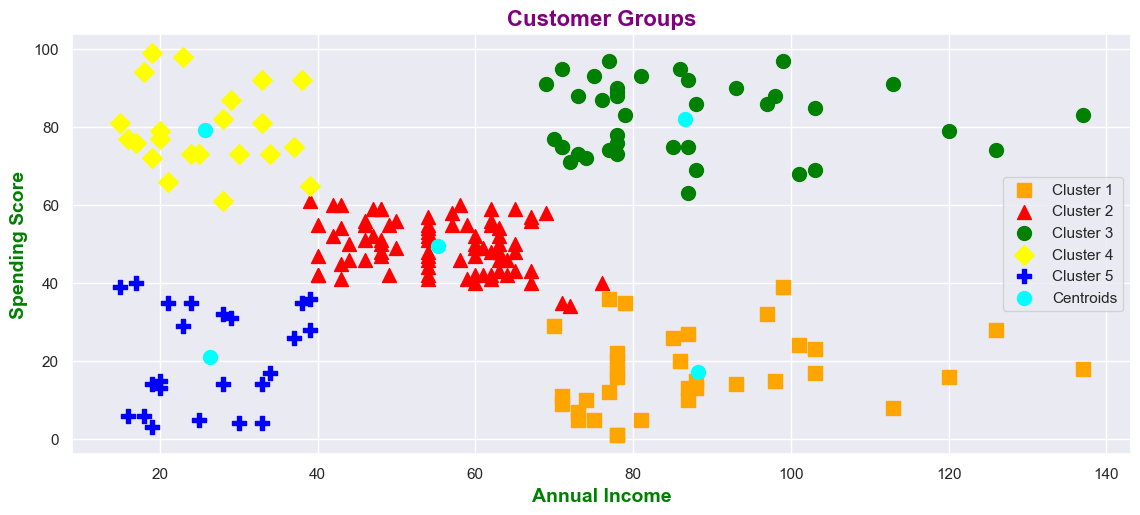

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import*
from tkinter import ttk

def cluster_analysis():
    global customer_data
    global X
    global wcss

    # loading the data from csv file to a Pandas DataFrame
    customer_data = pd.read_csv('C:/Users/DANIYAL1/Desktop/Mall_Customers.csv')

    # Preprocessing
    customer_data.info()
    customer_data.isnull().sum()

    X = customer_data.iloc[:,[3,4]].values

    wcss = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow Point Graph
    sns.set()
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Point Graph', fontsize=16, fontweight='bold', color='purple')
    plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold', color='green')
    plt.ylabel('WCSS', fontsize=14, fontweight='bold', color='green')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Display success message
    messagebox.showinfo("Success", "Data processing completed successfully!")

    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

    # return a label for each data point based on their cluster
    Y = kmeans.fit_predict(X)

    # Plotting the clusters
# Plotting the clusters
    fig, ax = plt.subplots(figsize=(10,10))  # Adjust the size to create a square plot
    ax.scatter(X[Y==0,0], X[Y==0,1], s=100, c='orange', marker='s', label='Cluster 1') # Square marker
    ax.scatter(X[Y==1,0], X[Y==1,1], s=100, c='red', marker='^', label='Cluster 2')    # Triangle marker
    ax.scatter(X[Y==2,0], X[Y==2,1], s=100, c='green', marker='o', label='Cluster 3')  # Circle marker
    ax.scatter(X[Y==3,0], X[Y==3,1], s=100, c='yellow', marker='D', label='Cluster 4') # Diamond marker
    ax.scatter(X[Y==4,0], X[Y==4,1], s=100, c='blue', marker='P', label='Cluster 5')   # Plus marker


    # plot the centroids
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

    ax.set_title('Customer Groups', fontsize=16, fontweight='bold', color='purple')
    ax.set_xlabel('Annual Income', fontsize=14, fontweight='bold', color='green')
    ax.set_ylabel('Spending Score', fontsize=14, fontweight='bold', color='green')
    ax.legend()

    # Embedding plot into Tkinter GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Create main window
root = tk.Tk()
root.title("Customer Clustering Analysis")

# Set window size and position
window_width = 600
window_height = 600
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_coordinate = (screen_width / 2) - (window_width / 2)
y_coordinate = (screen_height / 2) - (window_height / 2)
root.geometry("%dx%d+%d+%d" % (window_width, window_height, x_coordinate, y_coordinate))

# Set background color
root.configure(bg='white')

# Set fonts
font_title = ('Helvetica', 20, 'bold')
font_heading = ('Helvetica', 16, 'bold')

# Create project name heading
label_project = tk.Label(root, text="Customer Segmentation Project Using K-means Clustering", justify='left',font=("Helvetica",36,'bold'), bg='thistle1', fg='purple')
label_project.pack(side=TOP,fill="x")

label_name = tk.Label(root, text="Project By: AREESHA REHAN", font=font_title,justify='left', bg='white', fg='black')
label_name.pack(pady=(0, 0))

button = tk.Button(root, text="Perform Clustering Analysis", command=cluster_analysis, bg='thistle', fg='purple', font=('Helvetica', 14, 'bold'))
button.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()
